# 海伦约会KNN案例

In [17]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import operator

## 处理数据（打开文件，提取特征值，提取结果集）

In [18]:
def file2Matrix(fileName):
    #打开文件
    fr = open(fileName)
    #读取文件所有内容
    arrayOLines = fr.readlines()
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

## 数据归一化

In [38]:
def autoNorm(dataSet):
    # 获得最小值，min(0)返回每一列的最小值，min(1)返回每一行的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 最大值和最小值的范围
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    # 原始值减最小值
    normDataSet = dataSet - np.tile(minVals,(m,1))
    # 除以最大和最下值的差，得到归一化数据
    normDataSet = normDataSet / np.tile(ranges,(m,1))
    # 返回归一化的矩阵、数据范围、最小值
    return normDataSet, ranges, minVals

## KNN分类

In [39]:
def classify0(inx, dataset, labels, k):# 参数分别为 输入，训练样本集，标签，近邻个数
    '''
    计算输入矩阵到样本集的欧氏距离
    '''
    dataSetSize = dataset.shape[0] # 返回行数
    # tile函数将第一个参数行复值dataSetSize次，列复制1次，以达到和dataset同维度的效果
    diffMat = np.tile(inx, (dataSetSize,1)) - dataset # 将输入和所有的样本集各维对应相减
    sqDiffMat = diffMat ** 2 #各维数据各自求平方
    sqDistances = sqDiffMat.sum(axis = 1) #sum(0)列内求和，sum(1)行内求和
    distances = sqDistances ** 0.5
    sortedDistIndices = distances.argsort() #返回值由小达到排序后的索引
    
    '''
    统计距离最近的前k个样本分别是什么类型的电影
    '''
    classCount = {}
    for i in range(k):
        # 取出前k个元素的类别
        votelabel = labels[sortedDistIndices[i]]
        classCount[votelabel] = classCount.get(votelabel, 0) + 1 # 如果不存在返回0
    
    '''
    返回次数最多的类别
    '''
    # key = operator.itemgetter(1)根据字典的值进行排序
    # key = operator.itemgetter(0)根据字典的键进行排序
    # reverse降序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [40]:
def datingClassTest(fileName):
    #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2Matrix(fileName)
    #取所有数据的百分之十
    hoRatio = 0.10
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #获得normMat的行数
    m = normMat.shape[0]
    #百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    #分类错误计数
    errorCount = 0.0

    for i in range(numTestVecs):
        #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],
            datingLabels[numTestVecs:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))

## 数据可视化

In [60]:
def showDatas(datingDataMat, datingLabels):
    #设置汉字格式
    #font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数')
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

## 自定义输入测试

In [67]:
def classifyPerson():
    # 输出结果
    resultList = ['讨厌','有点喜欢','非常喜欢']
    # 三维特征用户输入
    precentTats = float(input("玩视频游戏所耗时间百分比："))
    ffMiles = float(input("每年获得的飞行常客里程数："))
    iceCream = float(input("每周消费的冰激凌公升数："))
    # 打开文件并处理
    fileName = "Data/datingTestSet.txt"
    datingDataMat, datingLabels = file2Matrix(fileName)
    # 训练集归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # 生成numpy测试集
    inArr = np.array([precentTats, ffMiles, iceCream])
    # 测试集归一化
    normInArr = (inArr - minVals) / ranges
    # 返回分类结果
    classifierResult = classify0(normInArr, normMat, datingLabels, 3)
    print("你可能是被%s的这类人" % (resultList[classifierResult]))

## 主函数

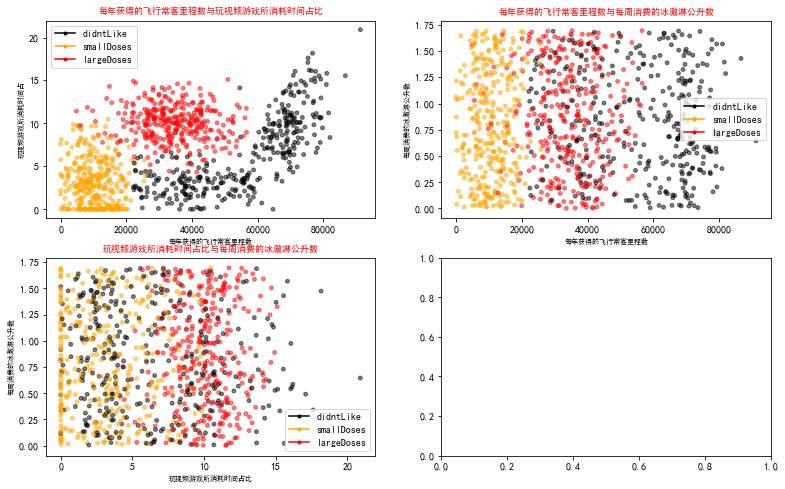

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

In [68]:
fileName = "Data/datingTestSet.txt"
datingDataMat, datingLabels = file2Matrix(fileName)
showDatas(datingDataMat, datingLabels)
datingClassTest(fileName)
classifyPerson()